# CAPSTONE PROJECT via SQL

In [1]:
# Importing Libraries
import pandas as pd
import sqlite3
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib import pyplot as plt

In [3]:
import sqlite3

conn = sqlite3.connect(":memory:")

In [4]:
# Firstly getting all data
customers = pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv') 
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv') 
product_category = pd.read_csv('product_category_name_translation.csv')

In [5]:
### I did 2 steps here, one of using sql to whole merged data. Second one is joining data via sql.

In [6]:
# To use sql, let's use to_sql command
customers.to_sql("customers",  conn, if_exists="replace")
order_items.to_sql("order_items",  conn, if_exists="replace")
order_payments.to_sql("order_payments",  conn, if_exists="replace")
orders.to_sql("orders",  conn, if_exists="replace")
products.to_sql("products",  conn, if_exists="replace")
sellers.to_sql("sellers",  conn, if_exists="replace")
product_category.to_sql("product_category", conn, if_exists="replace")

In [116]:
prod_cat='''

Select * from product_category
limit 5

''';
pd.read_sql(prod_cat,conn)

,index,product_category_name,product_category_name_english
0,0,beleza_saude,health_beauty
1,1,informatica_acessorios,computers_accessories
2,2,automotivo,auto
3,3,cama_mesa_banho,bed_bath_table
4,4,moveis_decoracao,furniture_decor


In [115]:

sellers='''

Select * from sellers
limit 5

''';
pd.read_sql(sellers,conn)

,index,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [109]:
# to see first 5 rows of the customers
products='''

Select * from products
limit 5

''';
pd.read_sql(products,conn)

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [71]:
# to see first 5 rows of the customers
order_payments='''

Select * from order_payments
limit 5

''';
pd.read_sql(order_payments,conn)

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
# to see first 5 rows of the orders data
orders_table='''

Select * from orders
limit 5

''';
pd.read_sql(orders_table,conn)

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
# to see first 5 rows of the customers
sql='''

Select * from customers
limit 5

''';
pd.read_sql(sql,conn)

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [102]:
# to see first 5 rows of the customers
order_items='''

Select * from order_items
limit 5

''';
pd.read_sql(order_items,conn)

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [23]:
customer_order =("""
SELECT COUNT(*) AS len_data
FROM orders
INNER JOIN customers
ON customers.customer_id = orders.customer_id
 """)
pd.read_sql(customer_order,conn)
# we can join two tables

,len_data
0,99441


In [30]:
customer_order =("""
SELECT distinct(orders.customer_id), COUNT(order_id) AS count_order
FROM orders
INNER JOIN customers
ON customers.customer_id = orders.customer_id
group by order_id
order by count_order desc
 """)
pd.read_sql(customer_order,conn)

,customer_id,count_order
0,96d649da0cc4ff33bb408b199d4c7dcf,1
1,b5e6afd5a41800fdf401e0272ca74655,1
2,29309aa813182aaddc9b259e31b870e6,1
3,84c5d4fbaf120aae381fad077416eaa0,1
4,b51593916b4b8e0d6f66f2ae24f2673d,1
...,...,...
99436,58dbd0b2d70206bf40e62cd34e84d795,1
99437,d4eb9395c8c0431ee92fce09860c5a06,1
99438,6489ae5e4333f3693df5ad4372dab6d3,1
99439,f6dd3ec061db4e3987629fe6b26e5cce,1


In [42]:
customer_city =("""
SELECT customer_city,count(order_id) AS count_order
FROM orders
INNER JOIN customers
ON customers.customer_id = orders.customer_id
group by customer_city
order by count_order desc
limit 30
 """)
pd.read_sql(customer_city,conn)

,customer_city,count_order
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


In [63]:
customer_state =pd.read_sql ("""
SELECT customer_state,count(order_id) AS count_order
FROM orders
INNER JOIN customers
ON customers.customer_id = orders.customer_id
group by customer_city
order by count_order desc
limit 20
 """,conn)
customer_state

,customer_state,count_order
0,SP,15540
1,RJ,6882
2,MG,2773
3,DF,2131
4,PR,1521
5,SP,1444
6,RS,1379
7,BA,1245
8,SP,1189
9,SP,938


Text(0.5, 1.0, 'Customer states according to order counts')

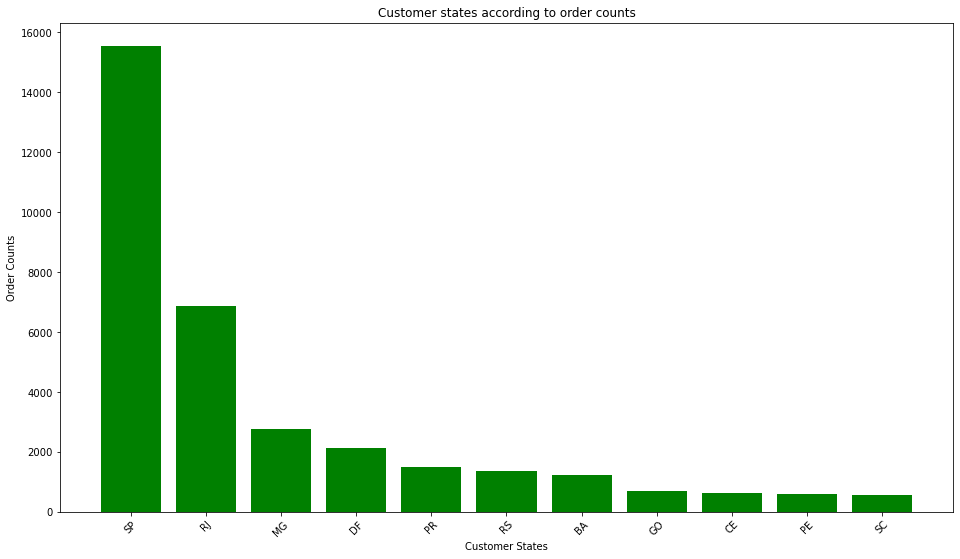

In [64]:
state = customer_state["customer_state"]
values = customer_state["count_order"]
   

plt.bar(state,values, color ='green',  
        width = 0.8) 
plt.xticks(rotation= 45)
plt.rcParams["figure.figsize"] = [16,9]
  
plt.xlabel("Customer States") 
plt.ylabel("Order Counts") 
plt.title("Customer states according to order counts") 
#plt.show() 

In [65]:
order_status =pd.read_sql("""
SELECT order_status,count(order_id) AS count_order
FROM orders
INNER JOIN customers
ON customers.customer_id = orders.customer_id
group by order_status
order by count_order desc

 """,conn)
order_status

,order_status,count_order
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


Text(0.5, 1.0, 'Order Status vs Order Counts')

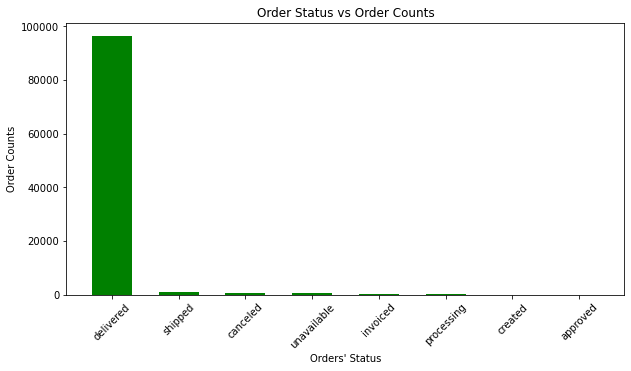

In [69]:
status = order_status["order_status"]
values = order_status["count_order"]
   

plt.bar(status,values, color ='green',  
        width = 0.6) 
plt.xticks(rotation= 45)
plt.rcParams["figure.figsize"] = [9,4]
  
plt.xlabel("Orders' Status") 
plt.ylabel("Order Counts") 
plt.title("Order Status vs Order Counts") 
#plt.show() 

In [93]:
customer_order_items =pd.read_sql("""
SELECT orders.order_id,orders.customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
FROM orders
INNER JOIN customers ON orders.customer_id=customers.customer_id
INNER JOIN order_payments ON orders.order_id=order_payments.order_id
 """,conn)
customer_order_items

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,2,voucher,1,18.59
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,3,voucher,1,2.00
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,barreiras,BA,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,credit_card,3,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103881,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,SP,1,credit_card,3,85.08
103882,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,praia grande,SP,1,credit_card,3,195.00
103883,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA,1,credit_card,5,271.01
103884,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ,1,credit_card,4,441.16


In [101]:
Payment =pd.read_sql("""
SELECT payment_type,ROUND(AVG(payment_value),2) AS AVG, ROUND(SUM(payment_value),2) AS total_sum, ROUND(MIN(payment_value),2) AS MIN,ROUND(MAX(payment_value),2) AS MAX
FROM orders
INNER JOIN customers ON orders.customer_id=customers.customer_id
INNER JOIN order_payments ON orders.order_id=order_payments.order_id
group by payment_type
ORDER BY total_sum desc
 """,conn)
Payment

,payment_type,AVG,total_sum,MIN,MAX
0,credit_card,163.32,12542084.19,0.01,13664.08
1,boleto,145.03,2869361.27,11.62,7274.88
2,voucher,65.70,379436.87,0.00,3184.34
3,debit_card,142.57,217989.79,13.38,4445.50
4,not_defined,0.00,0.00,0.00,0.00


In [106]:
customer_payment =pd.read_sql("""
SELECT payment_type,ROUND(AVG(payment_value),2) AS AVG, ROUND(SUM(payment_value),2) AS total_sum, ROUND(MIN(payment_value),2) AS MIN,ROUND(MAX(payment_value),2) AS MAX
FROM orders
INNER JOIN customers ON orders.customer_id=customers.customer_id
INNER JOIN order_payments ON orders.order_id=order_payments.order_id
INNER JOIN order_items ON orders.order_id=order_items.order_id
group by payment_type
ORDER BY total_sum desc
 """,conn)
customer_payment

,payment_type,AVG,total_sum,MIN,MAX
0,credit_card,179.66,15589028.22,0.01,13664.08
1,boleto,177.54,4059699.60,11.62,7274.88
2,voucher,64.69,405873.03,0.00,1839.05
3,debit_card,149.93,253533.86,13.38,4445.50


In [108]:
customer_payment =pd.read_sql("""
SELECT payment_type,ROUND(AVG(payment_value),2) AS AVG, ROUND(SUM(payment_value),2) AS total_sum, ROUND(MIN(payment_value),2) AS MIN,ROUND(MAX(payment_value),2) AS MAX
FROM orders
INNER JOIN customers ON orders.customer_id=customers.customer_id
INNER JOIN order_payments ON orders.order_id=order_payments.order_id
INNER JOIN order_items ON orders.order_id=order_items.order_id
group by payment_installments
ORDER BY total_sum desc
 """,conn)
customer_payment

,payment_type,AVG,total_sum,MIN,MAX
0,credit_card,132.32,7756342.37,0.00,13664.08
1,credit_card,431.28,2952124.72,37.67,4950.34
2,credit_card,134.59,1846821.16,20.03,2442.82
3,credit_card,153.87,1808919.64,30.00,3256.14
4,credit_card,310.66,1572881.70,37.58,6929.31
5,credit_card,179.22,1430001.08,40.00,3126.50
6,credit_card,197.99,1191324.71,49.99,4809.44
7,credit_card,234.57,1083004.22,59.99,2828.42
8,credit_card,193.79,354243.27,69.97,2094.44
9,credit_card,204.16,148223.58,90.11,1225.99


In [49]:
conn.execute("""CREATE VIEW Everything AS
SELECT * from orders
INNER JOIN customers ON orders.customer_id=customers.customer_id
INNER JOIN order_payments ON orders.order_id=order_payments.order_id
INNER JOIN order_items ON orders.order_id=order_items.order_id
INNER JOIN sellers ON order_items.seller_id=sellers.seller_id
INNER JOIN products ON order_items.product_id=products.product_id
INNER JOIN product_category on products.product_category_name=product_category.product_category_name_english """)


In [63]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [65]:
pd.set_option('display.max_rows', 500)
seller = pd.read_sql("""SELECT seller_state,customer_state,product_id,freight_value
FROM Everything
order by product_id,freight_value DESC
limit 100
""", conn)
seller


,seller_state,customer_state,product_id,freight_value
0,SP,RS,00126f27c813603687e6ce486d909d01,16.49
1,SP,SP,00126f27c813603687e6ce486d909d01,13.24
2,SP,GO,001795ec6f1b187d37335e1c4704762e,16.11
3,SP,GO,001795ec6f1b187d37335e1c4704762e,16.11
4,SP,ES,001795ec6f1b187d37335e1c4704762e,15.11
5,SP,SP,001795ec6f1b187d37335e1c4704762e,12.69
6,SP,SP,001795ec6f1b187d37335e1c4704762e,9.34
7,SP,SP,001795ec6f1b187d37335e1c4704762e,9.34
8,SP,SP,001795ec6f1b187d37335e1c4704762e,9.34
9,SP,SP,001795ec6f1b187d37335e1c4704762e,9.34


In [123]:
total_data = pd.read_sql("""
SELECT orders.customer_id,customers.customer_city, customers.customer_state,sellers.seller_city,sellers.seller_state, customers.customer_unique_id,orders.order_id,order_payments.payment_type,order_payments.payment_value,product_category_name_english
from orders
INNER JOIN customers ON orders.customer_id=customers.customer_id
INNER JOIN order_payments ON orders.order_id=order_payments.order_id
INNER JOIN order_items ON orders.order_id=order_items.order_id
INNER JOIN sellers ON order_items.seller_id=sellers.seller_id
INNER JOIN products ON order_items.product_id=products.product_id
INNER JOIN product_category on products.product_category_name=product_category.product_category_name
 """,conn)
total_data

,customer_id,customer_city,customer_state,seller_city,seller_state,customer_unique_id,order_id,payment_type,payment_value,product_category_name_english
0,9ef432eb6251297304e76186b10a928d,sao paulo,SP,maua,SP,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,credit_card,18.12,housewares
1,9ef432eb6251297304e76186b10a928d,sao paulo,SP,maua,SP,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,voucher,2.00,housewares
2,9ef432eb6251297304e76186b10a928d,sao paulo,SP,maua,SP,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,voucher,18.59,housewares
3,b0830fb4747a6c6d20dea0b8c802d7ef,barreiras,BA,belo horizonte,SP,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,boleto,141.46,perfumery
4,41ce2a54c0b03bf3443c3d931a367089,vianopolis,GO,guariba,SP,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,credit_card,179.12,auto
...,...,...,...,...,...,...,...,...,...,...
115873,1fca14ff2861355f6e5f14306ff977a7,praia grande,SP,tupa,SP,da62f9e57a76d978d02ab5362c509660,63943bddc261676b46f01ca7ac2f7bd8,credit_card,195.00,baby
115874,1aa71eb042121263aafbe80c1b562c9c,nova vicosa,BA,sao paulo,SP,737520a9aad80b3fbbdad19b66b37b30,83c1379a015df1e13d02aae0204711ab,credit_card,271.01,home_appliances_2
115875,b331b74b18dc79bcdf6532d51e1637c1,japuiba,RJ,ilicinea,MG,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62,credit_card,441.16,computers_accessories
115876,b331b74b18dc79bcdf6532d51e1637c1,japuiba,RJ,ilicinea,MG,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62,credit_card,441.16,computers_accessories


In [69]:
seller_cat = pd.read_sql("""
SELECT sellers.seller_id,sellers.seller_city,sellers.seller_state,COUNT(distinct(product_category_name_english)) AS category_count, count(orders.order_id) as order_count,sum(price)
from orders
INNER JOIN customers ON orders.customer_id=customers.customer_id
INNER JOIN order_payments ON orders.order_id=order_payments.order_id
INNER JOIN order_items ON orders.order_id=order_items.order_id
INNER JOIN sellers ON order_items.seller_id=sellers.seller_id
INNER JOIN products ON order_items.product_id=products.product_id
INNER JOIN product_category on products.product_category_name=product_category.product_category_name
group by sellers.seller_id
order by order_count desc
limit 20
 """,conn)
seller_cat
# to see seller's product categories

,seller_id,seller_city,seller_state,category_count,order_count,sum(price)
0,4a3ca9315b744ce9f8e9374361493884,ibitinga,SP,7,2133,213299.57
1,6560211a19b47992c3666cc44a7e94c0,sao paulo,SP,7,2122,128489.82
2,1f50f920176fa81dab994f9023523100,sao jose do rio preto,SP,3,2008,111435.81
3,cc419e0650a3c5ba77189a1882b7556a,santo andre,SP,4,1847,108439.73
4,da8622b14eb17ae2831f4ac5b9dab84a,piracicaba,SP,4,1639,169297.77
5,955fee9216a65b617aa5c0531780ce60,sao paulo,SP,23,1528,137335.00
6,1025f0e2d44d7041d6cf58b6550e0bfa,sao paulo,SP,4,1462,142130.94
7,7c67e1448b00f6e969d365cea6b010ab,itaquaquecetuba,SP,6,1452,198194.33
8,7a67c85e85bb2ce8582c35f2203ad736,sao paulo,SP,2,1240,149939.84
9,ea8482cd71df3c1969d7b9473ff13abc,sao paulo,SP,2,1239,38227.88


In [70]:
seller_cat = pd.read_sql("""
SELECT sellers.seller_id,sellers.seller_city,sellers.seller_state,COUNT(distinct(product_category_name_english)) AS category_count, count(orders.order_id) as order_count,sum(price)
from orders
INNER JOIN customers ON orders.customer_id=customers.customer_id
INNER JOIN order_payments ON orders.order_id=order_payments.order_id
INNER JOIN order_items ON orders.order_id=order_items.order_id
INNER JOIN sellers ON order_items.seller_id=sellers.seller_id
INNER JOIN products ON order_items.product_id=products.product_id
INNER JOIN product_category on products.product_category_name=product_category.product_category_name
group by sellers.seller_id
order by sum(price) desc
limit 20
 """,conn)
seller_cat

,seller_id,seller_city,seller_state,category_count,order_count,sum(price)
0,53243585a1d6dc2643021fd1853d8905,lauro de freitas,BA,2,437,244627.55
1,4869f7a5dfa277a7dca6462dcf3b52b2,guariba,SP,10,1186,237867.23
2,4a3ca9315b744ce9f8e9374361493884,ibitinga,SP,7,2133,213299.57
3,fa1c13f2614d7b5c4749cbc52fecda94,sumare,SP,5,609,203984.22
4,7c67e1448b00f6e969d365cea6b010ab,itaquaquecetuba,SP,6,1452,198194.33
5,7e93a43ef30c4f03f38b393420bc753a,barueri,SP,8,352,182878.17
6,da8622b14eb17ae2831f4ac5b9dab84a,piracicaba,SP,4,1639,169297.77
7,7a67c85e85bb2ce8582c35f2203ad736,sao paulo,SP,2,1240,149939.84
8,1025f0e2d44d7041d6cf58b6550e0bfa,sao paulo,SP,4,1462,142130.94
9,955fee9216a65b617aa5c0531780ce60,sao paulo,SP,23,1528,137335.00


In [74]:
seller_cat = pd.read_sql("""
SELECT sellers.seller_id,sellers.seller_city,sellers.seller_state,product_category.product_category_name_english AS category
from orders
INNER JOIN customers ON orders.customer_id=customers.customer_id
INNER JOIN order_payments ON orders.order_id=order_payments.order_id
INNER JOIN order_items ON orders.order_id=order_items.order_id
INNER JOIN sellers ON order_items.seller_id=sellers.seller_id
INNER JOIN products ON order_items.product_id=products.product_id
INNER JOIN product_category on products.product_category_name=product_category.product_category_name
where sellers.seller_id='53243585a1d6dc2643021fd1853d8905'

 """,conn)
seller_cat

,seller_id,seller_city,seller_state,category
0,53243585a1d6dc2643021fd1853d8905,lauro de freitas,BA,telephony
1,53243585a1d6dc2643021fd1853d8905,lauro de freitas,BA,telephony
2,53243585a1d6dc2643021fd1853d8905,lauro de freitas,BA,telephony
3,53243585a1d6dc2643021fd1853d8905,lauro de freitas,BA,telephony
4,53243585a1d6dc2643021fd1853d8905,lauro de freitas,BA,telephony
5,53243585a1d6dc2643021fd1853d8905,lauro de freitas,BA,telephony
6,53243585a1d6dc2643021fd1853d8905,lauro de freitas,BA,telephony
7,53243585a1d6dc2643021fd1853d8905,lauro de freitas,BA,telephony
8,53243585a1d6dc2643021fd1853d8905,lauro de freitas,BA,telephony
9,53243585a1d6dc2643021fd1853d8905,lauro de freitas,BA,telephony


In [75]:

seller_cat = pd.read_sql("""
SELECT sellers.seller_id,sellers.seller_city,sellers.seller_state,product_category.product_category_name_english AS category
from orders
INNER JOIN customers ON orders.customer_id=customers.customer_id
INNER JOIN order_payments ON orders.order_id=order_payments.order_id
INNER JOIN order_items ON orders.order_id=order_items.order_id
INNER JOIN sellers ON order_items.seller_id=sellers.seller_id
INNER JOIN products ON order_items.product_id=products.product_id
INNER JOIN product_category on products.product_category_name=product_category.product_category_name
where sellers.seller_id='edb1ef5e36e0c8cd84eb3c9b003e486d'

 """,conn)
seller_cat

,seller_id,seller_city,seller_state,category
0,edb1ef5e36e0c8cd84eb3c9b003e486d,teresopolis,RJ,health_beauty
1,edb1ef5e36e0c8cd84eb3c9b003e486d,teresopolis,RJ,health_beauty
2,edb1ef5e36e0c8cd84eb3c9b003e486d,teresopolis,RJ,health_beauty
3,edb1ef5e36e0c8cd84eb3c9b003e486d,teresopolis,RJ,health_beauty
4,edb1ef5e36e0c8cd84eb3c9b003e486d,teresopolis,RJ,health_beauty
5,edb1ef5e36e0c8cd84eb3c9b003e486d,teresopolis,RJ,health_beauty
6,edb1ef5e36e0c8cd84eb3c9b003e486d,teresopolis,RJ,health_beauty
7,edb1ef5e36e0c8cd84eb3c9b003e486d,teresopolis,RJ,health_beauty
8,edb1ef5e36e0c8cd84eb3c9b003e486d,teresopolis,RJ,health_beauty
9,edb1ef5e36e0c8cd84eb3c9b003e486d,teresopolis,RJ,health_beauty


In [136]:
seller_info = pd.read_sql("""
SELECT sellers.seller_id,sellers.seller_city,sellers.seller_state,COUNT(orders.order_id) AS order_count,COUNT(distinct(product_category_name_english)) AS category_count,ROUND(SUM(order_payments.payment_value),2)AS total_income,product_category_name_english
from orders
INNER JOIN customers ON orders.customer_id=customers.customer_id
INNER JOIN order_payments ON orders.order_id=order_payments.order_id
INNER JOIN order_items ON orders.order_id=order_items.order_id
INNER JOIN sellers ON order_items.seller_id=sellers.seller_id
INNER JOIN products ON order_items.product_id=products.product_id
INNER JOIN product_category on products.product_category_name=product_category.product_category_name
group by sellers.seller_id
order by order_count desc,category_count desc
 """,conn)
seller_info
# to see seller's product categories

,seller_id,seller_city,seller_state,order_count,category_count,total_income,product_category_name_english
0,4a3ca9315b744ce9f8e9374361493884,ibitinga,SP,2133,7,301245.27,bed_bath_table
1,6560211a19b47992c3666cc44a7e94c0,sao paulo,SP,2122,7,179657.75,watches_gifts
2,1f50f920176fa81dab994f9023523100,sao jose do rio preto,SP,2008,3,290253.42,garden_tools
3,cc419e0650a3c5ba77189a1882b7556a,santo andre,SP,1847,4,141309.58,health_beauty
4,da8622b14eb17ae2831f4ac5b9dab84a,piracicaba,SP,1639,4,272219.32,bed_bath_table
...,...,...,...,...,...,...,...
3028,fe9d9cf8631285d5982c6e2cf27fb114,barbacena/ minas gerais,MG,1,1,93.54,sports_leisure
3029,feb793c88d836c3a75efa4b5a3465d70,sao paulo,SP,1,1,530.17,garden_tools
3030,fec6912baad85d41729669edd6b4d3b8,ribeirao preto,SP,1,1,261.97,construction_tools_construction
3031,fedaedd3ca31d56ab33e92035e4b361c,niteroi,RJ,1,1,50.86,baby


In [20]:
# There were 9 datasets in brazil e-commerce data, I combined 8 of them and kept as data, examined geolocation separately.
data = pd.merge(orders,order_payments, on="order_id")
data = data.merge(customers, on="customer_id")
data = data.merge(order_items, on="order_id")
data = data.merge(sellers, on='seller_id')
data = data.merge(products, on="product_id")
data = data.merge(product_category, on="product_category_name")
data = data.merge(order_reviews , on='order_id') 

In [83]:
# The product categories in the data were in both Portuguese and English, I dropped the Portuguese ones as well.
data.drop(['product_category_name'], axis = 1, inplace = True)
# I joined product to get product_id and to join product_category with data, I will not use below attributes, I dropped it.
#data.drop(['product_name_lenght', 'product_photos_qty', 'product_length_cm'], axis=1, inplace=True)
#data.drop(['product_weight_g','product_width_cm','product_description_lenght','product_height_cm'], axis = 1, inplace = True)

In [84]:
data.drop(['review_comment_title', 'review_comment_message'], axis = 1, inplace = True)

In [85]:
#let's change the column name product_category_name_english' to product_category.
data.rename(columns={'product_category_name_english': 'product_category'},inplace=True)

In [86]:
data.to_sql("df",  conn, if_exists="replace")

In [87]:
## Test the code by select the complete table

sql='''

Select * from df
limit 5


''';

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)    
pd.read_sql_query(sql,conn)

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category,review_id,review_score,review_creation_date,review_answer_timestamp
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11 00:00:00,2017-10-12 03:43:48
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11 00:00:00,2017-10-12 03:43:48
2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11 00:00:00,2017-10-12 03:43:48
3,3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,3,37.77,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,9350,maua,SP,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,b46f1e34512b0f4c74a72398b03ca788,4,2017-08-19 00:00:00,2017-08-20 15:16:36
4,4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,1,37.77,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,9350,maua,SP,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,dc90f19c2806f1abba9e72ad3c350073,5,2017-08-08 00:00:00,2017-08-08 23:26:23


In [94]:
sql='''

Select product_weight_g,(product_length_cm*product_height_cm*product_width_cm) volume, freight_value, product_category,product_id
from df
where freight_value=7.78 and product_weight_g=500.0
limit 50


''';

    
pd.read_sql_query(sql,conn)

,product_weight_g,volume,freight_value,product_category,product_id
0,500.0,1976.0,7.78,housewares,87285b34884572647811a353c7ac498a
1,500.0,1976.0,7.78,housewares,87285b34884572647811a353c7ac498a
2,500.0,1058.0,7.78,housewares,c9bf1f1d7fdb5fa18943e2d9dad5de02
3,500.0,7560.0,7.78,housewares,038467f26869173dd87434ae02199a40
4,500.0,4140.0,7.78,baby,81e7937893af4703d4d14ca3e3765b59
5,500.0,15444.0,7.78,baby,dc1b575cdc26817d8826b684dec47b7c
6,500.0,5120.0,7.78,sports_leisure,b146d66b6ce3b149187e9f3349bfad68
7,500.0,4180.0,7.78,toys,e9def91e99c8ecb7c5cef5e31506a056
8,500.0,4180.0,7.78,toys,e9def91e99c8ecb7c5cef5e31506a056
9,500.0,4180.0,7.78,toys,e9def91e99c8ecb7c5cef5e31506a056


In [93]:
sql='''

Select product_weight_g,(product_length_cm*product_height_cm*product_width_cm) volume, freight_value, product_category,product_id
from df
where freight_value=14.10 and product_weight_g=500.0
limit 50


''';

    
pd.read_sql_query(sql,conn)

,product_weight_g,volume,freight_value,product_category,product_id
0,500.0,1976.0,14.1,housewares,87285b34884572647811a353c7ac498a
1,500.0,8000.0,14.1,housewares,8be155e42d9bde2616787ea27963ca71
2,500.0,15625.0,14.1,housewares,37bc5c7b7dca15cfcbe282fb0dd0bab3
3,500.0,15625.0,14.1,housewares,37bc5c7b7dca15cfcbe282fb0dd0bab3
4,500.0,15625.0,14.1,housewares,37bc5c7b7dca15cfcbe282fb0dd0bab3
5,500.0,5632.0,14.1,housewares,8de2d2a80d4900fc699d4f52fbe8c43a
6,500.0,24000.0,14.1,cool_stuff,93d23871be3281f1b1ee4962ecfd791b
7,500.0,4125.0,14.1,sports_leisure,af739e00ca90db9e164a8ee27237445a
8,500.0,4125.0,14.1,sports_leisure,6e74e16f5dc9add0502c7f68c1258f95
9,500.0,6000.0,14.1,sports_leisure,eddecafe978fc89774f82f552197bb08


In [99]:
sql='''

Select customer_id,order_item_id,customer_state,product_weight_g,(product_length_cm*product_height_cm*product_width_cm) volume, freight_value, product_category,product_id
from df
where  product_weight_g=500.0 and product_id='87285b34884572647811a353c7ac498a'
limit 50


''';

    
pd.read_sql_query(sql,conn)

,customer_id,order_item_id,customer_state,product_weight_g,volume,freight_value,product_category,product_id
0,9ef432eb6251297304e76186b10a928d,1,SP,500.0,1976.0,8.72,housewares,87285b34884572647811a353c7ac498a
1,9ef432eb6251297304e76186b10a928d,1,SP,500.0,1976.0,8.72,housewares,87285b34884572647811a353c7ac498a
2,9ef432eb6251297304e76186b10a928d,1,SP,500.0,1976.0,8.72,housewares,87285b34884572647811a353c7ac498a
3,a20e8105f23924cd00833fd87daa0831,1,SP,500.0,1976.0,7.78,housewares,87285b34884572647811a353c7ac498a
4,26c7ac168e1433912a51b924fbd34d34,1,SP,500.0,1976.0,7.78,housewares,87285b34884572647811a353c7ac498a
5,53904ddbea91e1e92b2b3f1d09a7af86,1,SC,500.0,1976.0,14.10,housewares,87285b34884572647811a353c7ac498a


In [100]:
sql='''

Select customer_state,product_weight_g,(product_length_cm*product_height_cm*product_width_cm) volume, freight_value, product_category
from df
limit 50


''';

    
pd.read_sql_query(sql,conn)

,customer_state,product_weight_g,volume,freight_value,product_category
0,SP,500.0,1976.0,8.72,housewares
1,SP,500.0,1976.0,8.72,housewares
2,SP,500.0,1976.0,8.72,housewares
3,SP,500.0,1976.0,7.78,housewares
4,SP,500.0,1976.0,7.78,housewares
5,SC,500.0,1976.0,14.10,housewares
6,SP,775.0,3328.0,67.70,housewares
7,SP,100.0,2457.0,3.05,housewares
8,AM,600.0,2160.0,21.15,housewares
9,SP,600.0,1920.0,7.78,housewares


In [71]:
sql='''

Select review_score,product_category, customer_id
from df
where order_status='delivered' and review_score=5
limit 50


''';

    
pd.read_sql_query(sql,conn)

,review_score,product_category,customer_id
0,5,housewares,26c7ac168e1433912a51b924fbd34d34
1,5,housewares,a286f46d6e54cc0179bbb0ee07b0df5e
2,5,housewares,68420570763989d8da614b8da4c5c102
3,5,housewares,55ad70f3207fcef17011bf16878d5b9f
4,5,housewares,cb3ee258016b1e793c1d6d1de6b9aef7
5,5,housewares,63ca9e5b1b7438892210e079c71ca22a
6,5,housewares,2e0b25d3a271e4c0f671acefb6cfaffd
7,5,housewares,9530f1fe1ea5a89c949794e7e8ebe6d0
8,5,housewares,0260bd7b3bf780786cc7ad501287d9d3
9,5,housewares,d36371b951fdccd7f6d3f1c09c241dc5


In [72]:
# look for customer_id, product_category and review score from the data where status is delivered and review_Score is equal to 5.
sql='''

Select review_score, product_category, customer_id
from df
where order_status='delivered' and review_score=5
group by customer_id
limit 50


''';

    
pd.read_sql_query(sql,conn)

,review_score,product_category,customer_id
0,5,baby,0001fd6190edaaf884bcaf3d49edf079
1,5,cool_stuff,0002414f95344307404f0ace7a26f1d5
2,5,toys,00046a560d407e99b969756e0b10f282
3,5,fashion_bags_accessories,00050bf6e01e69d5c0fd612f1bcfb69c
4,5,pet_shop,000598caf2ef4117407665ac33275130
5,5,baby,00072d033fe2e59061ae5c3aff1a2be5
6,5,furniture_decor,000bf8121c3412d3057d32371c5d3395
7,5,sports_leisure,000f17e290c26b28549908a04cfe36c1
8,5,telephony,0010068a73b7c56da5758c3f9e5c7375
9,5,health_beauty,001028b78fd413e19704b3867c369d3a


In [74]:
sql='''

Select customer_id, order_status
from df
where order_status='canceled'
limit 5


''';

    
pd.read_sql_query(sql,conn)

,customer_id,order_status
0,b03efbab821a8ef7b3e6b2a75ec7d74d,canceled
1,9391729f79cd9e5fd7ca884ca030f579,canceled
2,672510553bcfbf72de694db2cd88f046,canceled
3,672510553bcfbf72de694db2cd88f046,canceled
4,672510553bcfbf72de694db2cd88f046,canceled


In [77]:
product = pd.read_sql(
    """
    select product_category,count(1) count, sum(price)
    from df
    group by product_category
    order by count desc
    limit 20
    """,conn
)

In [78]:
product

,product_category,count,sum(price)
0,bed_bath_table,11847,1095770.05
1,health_beauty,9944,1290883.52
2,sports_leisure,8942,1022489.29
3,furniture_decor,8743,765336.72
4,computers_accessories,8105,944992.54
5,housewares,7331,664226.76
6,watches_gifts,6161,1245783.11
7,telephony,4692,335828.83
8,garden_tools,4558,515987.77
9,auto,4356,608914.30


In [36]:
category_state = pd.read_sql(
    """
    select product_category,count(1) count
    from df
    group by product_category
    order by count desc
    limit 20
    """,conn
)

In [37]:
category_state

,product_category,count
0,bed_bath_table,11847
1,health_beauty,9944
2,sports_leisure,8942
3,furniture_decor,8743
4,computers_accessories,8105
5,housewares,7331
6,watches_gifts,6161
7,telephony,4692
8,garden_tools,4558
9,auto,4356


In [39]:
price_sum = pd.read_sql(
    """
    select product_category,sum(price) sum
    from df
    group by product_category
    order by sum desc
    limit 20
    """,conn
)

In [40]:
price_sum

,product_category,sum
0,health_beauty,1290883.52
1,watches_gifts,1245783.11
2,bed_bath_table,1095770.05
3,sports_leisure,1022489.29
4,computers_accessories,944992.54
5,furniture_decor,765336.72
6,housewares,664226.76
7,cool_stuff,655820.40
8,auto,608914.30
9,garden_tools,515987.77


In [47]:
price_sum_describe = pd.read_sql(
    """
    select product_category,sum(price) sum, MAX(price) max, MIN(price) min, AVG(price) avg
    from df
    group by product_category
    order by sum desc
    limit 20
    """,conn
)

In [48]:
price_sum_describe

,product_category,sum,max,min,avg
0,health_beauty,1290883.52,3124.00,1.20,129.815318
1,watches_gifts,1245783.11,3999.90,8.99,202.204692
2,bed_bath_table,1095770.05,1999.98,6.99,92.493462
3,sports_leisure,1022489.29,4059.00,4.50,114.346823
4,computers_accessories,944992.54,3699.99,3.90,116.593774
5,furniture_decor,765336.72,1899.00,4.90,87.537083
6,housewares,664226.76,6735.00,3.06,90.605205
7,cool_stuff,655820.40,3109.99,7.00,165.444097
8,auto,608914.30,2258.00,3.49,139.787489
9,garden_tools,515987.77,3930.00,6.35,113.204864


In [58]:
categories_vs_description = pd.read_sql(
    """
    select product_category,count(1) count, sum(price) sum, MAX(price) max, MIN(price) min, AVG(price) avg
    from df
    group by product_category
    order by sum desc
    limit 20
    """,conn
)

In [59]:
categories_vs_description

,product_category,count,sum,max,min,avg
0,health_beauty,9944,1290883.52,3124.00,1.20,129.815318
1,watches_gifts,6161,1245783.11,3999.90,8.99,202.204692
2,bed_bath_table,11847,1095770.05,1999.98,6.99,92.493462
3,sports_leisure,8942,1022489.29,4059.00,4.50,114.346823
4,computers_accessories,8105,944992.54,3699.99,3.90,116.593774
5,furniture_decor,8743,765336.72,1899.00,4.90,87.537083
6,housewares,7331,664226.76,6735.00,3.06,90.605205
7,cool_stuff,3964,655820.40,3109.99,7.00,165.444097
8,auto,4356,608914.30,2258.00,3.49,139.787489
9,garden_tools,4558,515987.77,3930.00,6.35,113.204864


In [49]:
state_price = pd.read_sql(
    """
    select customer_state,sum(price) sum, MAX(price) max, MIN(price) min, AVG(price) avg
    from df
    group by customer_state
    order by sum desc
    limit 20
    """,conn
)

In [50]:
state_price

,customer_state,sum,max,min,avg
0,SP,5.367501e+06,6499.00,0.85,109.996537
1,RJ,1.867477e+06,4799.00,0.85,124.606432
2,MG,1.610763e+06,4099.99,3.85,119.946637
3,RS,7.793709e+05,3124.00,3.06,121.529850
4,PR,6.976208e+05,2999.99,2.90,118.663179
5,BA,5.304853e+05,2999.89,5.20,134.572618
6,SC,5.228461e+05,3109.99,3.90,123.955920
7,DF,3.113388e+05,3999.00,4.90,127.128955
8,GO,3.002842e+05,2299.95,3.90,127.293001
9,ES,2.709111e+05,1880.00,5.99,117.787422


In [56]:
product_review = pd.read_sql(
    """
    select product_category, AVG(review_score), sum(price) sum, MAX(price) max, MIN(price) min, AVG(price) avg
    from df
    group by customer_state
    order by AVG(review_score) desc,  sum(price) desc
    limit 20
    """,conn
)

In [57]:
product_review

,product_category,AVG(review_score),sum,max,min,avg
0,electronics,4.240964,1.360840e+04,1437.00,13.65,163.956627
1,computers_accessories,4.147147,5.567002e+04,2649.99,8.50,167.177237
2,construction_tools_construction,4.130910,5.367501e+06,6499.00,0.85,109.996537
3,pet_shop,4.105970,6.976208e+05,2999.99,2.90,118.663179
4,telephony,4.095238,2.210847e+04,1688.00,8.50,131.598036
5,music,4.086231,1.610763e+06,4099.99,3.85,119.946637
6,construction_tools_construction,4.078107,1.204827e+05,6735.00,6.10,142.583089
7,health_beauty,4.075269,1.699254e+04,1200.00,12.90,182.715484
8,auto,4.051786,9.326635e+04,1788.00,10.00,166.547054
9,housewares,4.044129,7.793709e+05,3124.00,3.06,121.529850


In [62]:
payment_type = pd.read_sql(
    """
    select payment_type,  sum(price) sum, MAX(price) max, MIN(price) min, AVG(price) avg
    from df
    group by payment_type
    order by  sum desc
    limit 20
    """,conn
)

In [63]:
payment_type

,payment_type,sum,max,min,avg
0,credit_card,1.077971e+07,6735.0,0.85,126.406684
1,boleto,2.343185e+06,6499.0,0.85,104.095290
2,voucher,6.412035e+05,3124.0,2.20,104.057686
3,debit_card,1.806425e+05,4059.0,5.99,108.886407


In [139]:
payment_types = pd.read_sql(
"""
select DISTINCT(payment_type)
from df
""", conn)
payment_types

,payment_type
0,credit_card
1,voucher
2,boleto
3,debit_card


In [154]:
voucher = pd.read_sql(
"""
select DISTINCT(payment_sequential)
from df
where payment_type='voucher'
""", conn)
voucher

,payment_sequential
0,3
1,2
2,1
3,5
4,6
5,4
6,8
7,7
8,13
9,11


In [155]:
voucher_install = pd.read_sql(
"""
select DISTINCT(payment_installments)
from df
where payment_type='voucher'
""", conn)
voucher_install

,payment_installments
0,1


In [141]:
credit_card = pd.read_sql(
"""
select DISTINCT(payment_sequential)
from df
where payment_type='credit_card'
""", conn)
credit_card

,payment_sequential
0,1
1,2


In [143]:
boleto = pd.read_sql(
"""
select DISTINCT(payment_sequential)
from df
where payment_type='boleto'
""", conn)
boleto

,payment_sequential
0,1
1,2


In [152]:
boleto_install = pd.read_sql(
"""
select DISTINCT(payment_installments)
from df
where payment_type='boleto'
""", conn)
boleto_install

,payment_installments
0,1


In [144]:
debit_card = pd.read_sql(
"""
select DISTINCT(payment_sequential)
from df
where payment_type='boleto'
""", conn)
debit_card

,payment_sequential
0,1
1,2


In [153]:
debit_card_install = pd.read_sql(
"""
select DISTINCT(payment_installments)
from df
where payment_type='boleto'
""", conn)
debit_card_install

,payment_installments
0,1


In [147]:
sql = '''
select price, payment_installments
from df
where product_category='telephony'
'''
pd.read_sql_query(sql, conn)

,price,payment_installments
0,13.98,1
1,27.99,24
2,69.90,24
3,27.99,10
4,27.99,10
5,42.99,1
6,39.90,18
7,28.99,3
8,17.99,10
9,49.90,8


In [151]:
sql = '''
select price, payment_installments, payment_type
from df
where payment_installments>20
'''
pd.read_sql_query(sql, conn)

,price,payment_installments,payment_type
0,229.99,24,credit_card
1,69.99,24,credit_card
2,27.99,24,credit_card
3,69.90,24,credit_card
4,589.00,24,credit_card
5,494.99,24,credit_card
6,1050.00,24,credit_card
7,209.99,22,credit_card
8,249.90,24,credit_card
9,268.88,24,credit_card


Tasks-38A: Please provide 5 examples related to subqueries very similar to the ones on this lesson in which you can use Google Colab and BigQuery as well as your Capstone dataset.

In [ ]:
# Firstly getting all data
customers = pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv') 
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv') 
product_category = pd.read_csv('product_category_name_translation.csv')

In [6]:
customers.to_sql("customers",  conn, if_exists="replace")

In [7]:
sql = '''
select *
from customers
LIMIT 5
'''
pd.read_sql_query(sql, conn)

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [23]:
order_items.to_sql('order_items', conn, if_exists='replace')

In [24]:
sql = '''
select * 
from order_items
LIMIT 5
'''
pd.read_sql_query(sql, conn)

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
orders.to_sql("orders",  conn, if_exists="replace")

In [10]:
sql = '''
select *
from orders
LIMIT 5
'''
pd.read_sql_query(sql,conn)

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [14]:
sql = '''
select order_id, customer_unique_id
from customers C, orders O
where customer_state ='SP' AND C.customer_id = O.customer_id
'''
pd.read_sql_query(sql, conn)

,order_id,customer_unique_id
0,00e7ee1b050b8499577073aeb2a297a1,861eff4711a542e4b93843c6dd7febb0
1,29150127e6685892b6eab3eec79f59c7,290c77bc529b7ac935b93aa66c333dc3
2,b2059ed67ce144a36e2aa97d2c9e9ad2,060e732b5b29e8181a18229c7b0b2b5e
3,951670f92359f4fe4a63112aa7306eba,259dac757896d24d7702b9acbbff3f3c
4,6b7d50bd145f6fc7f33cebabd7e49d0f,345ecd01c38d18a9036ed96c73b8d066
...,...,...
41741,ca978d2459ea2c5ef6d5fde02be26b9c,d111b06b6f3a2add0d2241325f65b5ca
41742,97d6c1727b0d36b8d04035e35d86f40f,b3e53d18a997f27a3ffd16da497eaf58
41743,6760e20addcf0121e9d58f2f1ff14298,1a29b476fee25c95fbafc67c5ac95cf8
41744,9ec0c8947d973db4f4e8dcf1fbfa8f1b,d52a67c98be1cf6a5c84435bd38d095d


In [22]:
sql = '''
SELECT count(order_id) as count_of_order,strftime('%m', order_purchase_timestamp) as month
FROM orders 
group by month

'''
pd.read_sql_query(sql, conn)

,count_of_order,month
0,8069,01
1,8508,02
2,9893,03
3,9343,04
4,10573,05
5,9412,06
6,10318,07
7,10843,08
8,4305,09
9,4959,10


In [41]:
conn.execute('''CREATE VIEW Everything_about_Seller_s
AS SELECT *
FROM customers
INNER JOIN orders ON customers.customer_id=orders.customer_id
LEFT JOIN order_items ON orders.order_id=order_items.order_id
LEFT JOIN order_payments ON order_items.order_id=order_payments.order_id
left JOIN products ON order_items.product_id=products.product_id
JOIN sellers ON order_items.seller_id=sellers.seller_id
JOIN product_category ON products.product_category_name=product_category.product_category_name_english
''')

In [23]:
pd.read_sql('''select product_id, count(product_id) from order_items group by product_id order by count(product_id) desc''', conn)

,product_id,count(product_id)
0,aca2eb7d00ea1a7b8ebd4e68314663af,527
1,99a4788cb24856965c36a24e339b6058,488
2,422879e10f46682990de24d770e7f83d,484
3,389d119b48cf3043d311335e499d9c6b,392
4,368c6c730842d78016ad823897a372db,388
...,...,...
32946,0011c512eb256aa0dbbb544d8dffcf6e,1
32947,000d9be29b5207b54e86aa1b1ac54872,1
32948,0009406fd7479715e4bef61dd91f2462,1
32949,00088930e925c41fd95ebfe695fd2655,1


In [13]:
pd.read_sql('''select * from products limit 1''', conn)

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
